In [1]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import sys
import re
import pandas as pd
import torch
import torch.nn as nn
import scipy
from scipy import ndimage
import torchvision
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from jupyterthemes import jtplot
import skimage
from skimage import transform
import random
import cv2
from torchvision import models
from tqdm import tqdm

data = pd.read_csv('../../fer2013/fer2013.csv')

In [2]:
print(len(data))
print(len(data.loc[0, 'pixels'].split(' ')))
print(data.groupby('Usage').count()[['emotions']])

#Frequency of each label
print('0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral')
table = data.groupby('emotions').count()[['Usage']]
table['Pct'] = table['Usage']/table['Usage'].sum()
table['Pct'] = table['Pct'].map(lambda x: round(x, 3)*100)
table

35887
2304
             emotions
Usage                
PrivateTest      3589
PublicTest       3589
Training        28709
0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral


,Usage,Pct
emotions,,
0,4953,13.8
1,547,1.5
2,5121,14.3
3,8989,25.0
4,6077,16.9
5,4002,11.2
6,6198,17.3


## 1) Converting to numpy datasets

In [3]:
def convert_to_numpy(data):
    X = data[:,1]
    X = np.asarray([np.asarray(X[i].split(" ")) for i in range(X.shape[0])])
    X = np.asarray([X[i].reshape(48,48).astype(int) for i in range(X.shape[0])])
    y = data[:,0]
    return (X,y)

In [4]:
train = data[data['Usage'] == 'Training']
train_X, train_Y = convert_to_numpy(train.values)
valid = data[data['Usage'] == 'PrivateTest']
valid_X, valid_Y = convert_to_numpy(valid.values)
test = data[data['Usage'] == 'PublicTest']
test_X, test_Y = convert_to_numpy(test.values)

## Experimenting with transformations

In [9]:
orig_image = train_X[0]


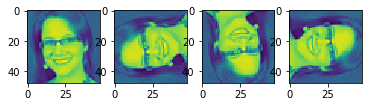

In [10]:
angles = [90, 180, 270]
plt.figure(1)
plt.subplot(141)
plt.imshow(orig_image)
for i in range(len(angles)):
    plt.subplot(1, 4, i+2)
    rotated_image = skimage.transform.rotate(orig_image, angles[i])
    plt.imshow(rotated_image)
    
plt.show()

## Experimenting with contrast

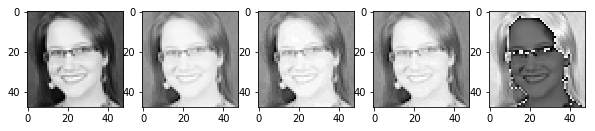

In [13]:
maxIntensity = 255.0 # depends on dtype of image data
x = np.arange(maxIntensity) 
plt.figure(1)
plt.figure(figsize=(10,15))
plt.subplot(151)
plt.imshow(orig_image, cmap='gray')

# Parameters for manipulating image data
phi_theta_combination = [(2,4), (100, 150), (100, 200), (2, 10)]

# Increase intensity such that
# dark pixels become much brighter, 
# bright pixels become slightly bright

for i in range(len(phi_theta_combination)):
    plt.subplot(1, 5, i+2)
    phi, theta = phi_theta_combination[i]
    newImage0 = (maxIntensity/phi)*(orig_image/(maxIntensity/theta))**0.5
    newImage0 = np.array(newImage0,dtype='uint8')
    plt.imshow(newImage0, cmap='gray')

plt.show()
